In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("Data/customer_churn_data.csv")

In [56]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [57]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [59]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [60]:
df['InternetService'] = df['InternetService'].fillna("")

In [61]:
df.InternetService.value_counts()

InternetService
Fiber Optic    395
DSL            308
               297
Name: count, dtype: int64

In [62]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
numeric_columns_data = df.select_dtypes(include=['number'])

In [65]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


<Axes: ylabel='count'>

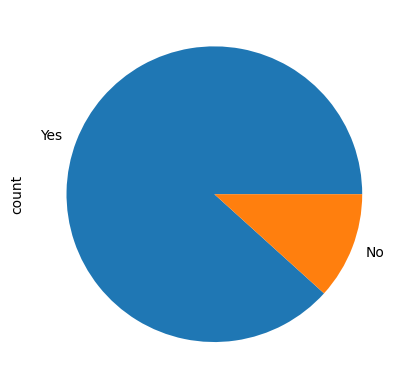

In [66]:
df['Churn'].value_counts().plot(kind ='pie')

In [67]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


<Axes: xlabel='Churn'>

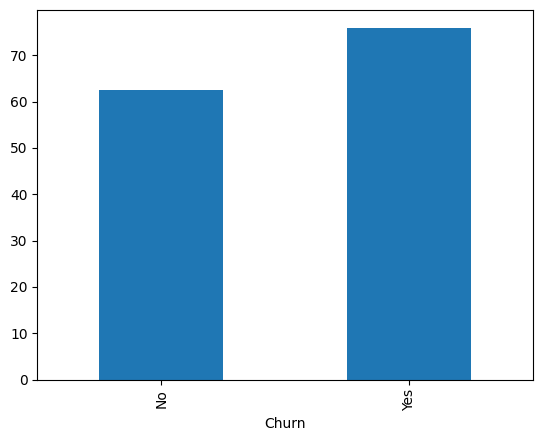

In [68]:
df.groupby('Churn')["MonthlyCharges"].mean().plot(kind='bar')

In [69]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [70]:
df.groupby('ContractType')['Tenure'].mean()

ContractType
Month-to-Month    19.056751
One-Year          19.249135
Two-Year          18.360000
Name: Tenure, dtype: float64

In [82]:
y = df[['Churn']]
X = df[['Age','Gender','Tenure','MonthlyCharges']]

In [83]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x.lower() == 'Female' else 0)
y['Churn'] = y['Churn'].apply(lambda x : 1 if x.lower() == 'yes' else 0)

C:\Users\saiki\AppData\Local\Temp\ipykernel_6256\1609188150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda x: 1 if x.lower() == 'Female' else 0)
C:\Users\saiki\AppData\Local\Temp\ipykernel_6256\1609188150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x : 1 if x.lower() == 'yes' else 0)


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [88]:
X_test = scaler.fit_transform(X_test)

In [89]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy of model is {}".format(accuracy_score(y_test,predictions)))

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [97]:
log_model = LogisticRegression()

In [92]:
log_model.fit(X_train,y_train)

c:\Users\saiki\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(y_train.value_counts())

Churn
1        790
0        110
Name: count, dtype: int64


In [93]:
y_pred = log_model.predict(X_test)

In [94]:
y_test

,Churn
527,1
666,1
33,1
344,1
295,1
...,...
45,1
741,1
419,1
548,1


In [95]:
modelperformance(y_pred)

Accuracy of model is 0.885


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier()
param_grid = { 
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"]
}

gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,CV = 5, )

c:\Users\saiki\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()